A file with columns for each repeat would be great thanks. I’ve attached the data in this email. I’m basing the species composition of the core in your biogeosciences paper, so I’m trying to construct a regression line with the following weighting, G. oceanica 45%, E. huxleyi 35%, C. pelagicus 15%, C. Leptoporus 5%.
 
Annoyingly, I have the fewest observations for G. Oceanica so this potentially wont work given that this will end up being a sample of 1 for C. Leptoporus? I think a regression line with equal weighting and a discussion of how this will lead to error in cell size estimates is the nest best option.
 
Great, thanks for having a look at the manuscript. End of the week should be do-able!
 
 

### Import required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read in the data from the excel file

In [2]:
file = '/Users/ph290/Downloads/Diameter_cell.xlsx'
diameter_data = pd.read_excel(file,sheet_name = None)

### Set the no. individuals to use for teh subsampling
here it is set to the minimum nuber in a any of the species' datasets

In [3]:
min_no_samples = np.min([len(diameter_data[species]['Cell']) for species in list(diameter_data)])

### Loop through and create the subsets

In [4]:
no_subsets = 100

df = pd.DataFrame(columns = list(diameter_data))
mydict={}

for species in list(diameter_data):
    mydict[species] = {}
    for i in np.arange(no_subsets):
        no_items = len(diameter_data[species]['Cell'])
        index_values = np.random.choice(no_items, min_no_samples, replace = False)
        mydict[species][str(i)] = {}
        mydict[species][str(i)]['Coccosphere'] = diameter_data[species]['Coccosphere'].iloc[index_values].values
        mydict[species][str(i)]['Cell'] = diameter_data[species]['Cell'].iloc[index_values].values


### Write out the data

In [5]:
columns = []

for species in list(mydict):
    for i in np.arange(no_subsets):
        for j in ['Coccosphere','Cell']:
            columns.append(species+'_'+j+'_'+str(i))

data = np.zeros([min_no_samples,len(columns)])
data[:] = np.nan

for y in range(min_no_samples):
    x = 0
    for species in list(mydict):
        for i in np.arange(no_subsets):
            for j in ['Coccosphere','Cell']:
                data[y,x] = mydict[species][str(i)][j][y]
                x += 1
                
df = pd.DataFrame (data, columns = columns)
df.to_csv('/Users/ph290/Downloads/Diameter_cell_subsets.csv', index=False)  

# Now combining species together

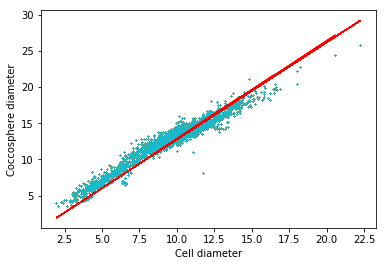

In [6]:
no_subsets = [15,5,35,45]
# G. oceanica 45%, E. huxleyi 35%, C. pelagicus 15%, C. Leptoporus 5%

data_Coccosphere = []
data_Cell = []
m = []
c = []

no_interations = 1000
for count in np.arange(no_interations):

    df = pd.DataFrame(columns = list(diameter_data))
    mydict={}

    for s,species in enumerate(list(diameter_data)):
        mydict[species] = {}
#         for i in np.arange(min_no_samples):
        no_items = len(diameter_data[species]['Cell'])
        index_values = np.random.choice(no_items, min_no_samples, replace = False)
        mydict[species][str(count)] = {}
        mydict[species][str(count)]['Coccosphere'] = diameter_data[species]['Coccosphere'].iloc[index_values].values
        mydict[species][str(count)]['Cell'] = diameter_data[species]['Cell'].iloc[index_values].values


#     columns = []

#     for s,species in enumerate(list(diameter_data)):
#         for i in np.arange(no_subsets[s]):
#             for j in ['Coccosphere','Cell']:
#                 columns.append(species+'_'+j+'_'+str(i))

#     data = np.zeros([min_no_samples,len(columns)])
#     data[:] = np.nan

#     for y in range(min_no_samples):
#         x = 0
#         for s,species in enumerate(list(diameter_data)):
#             for i in np.arange(no_subsets[s]):
#                 for j in ['Coccosphere','Cell']:
#                     data[y,x] = mydict[species][str(i)][j][y]
#                     x += 1
    
#     df = pd.DataFrame (data, columns = columns)
#     df.to_csv('/Users/ph290/Downloads/beth_weighted/weighted_diameter_cell_subsets_'+str(count)+'.csv', index=False)  
    
    

    for y in range(min_no_samples):
        for s,species in enumerate(list(diameter_data)):
            data_Coccosphere.append(mydict[species][str(count)]['Coccosphere'][y])
            data_Cell.append(mydict[species][str(count)]['Cell'][y])

    df2 = pd.DataFrame(data={
    'Coccosphere' : data_Coccosphere,
    'Cell' : data_Cell,
    })
    
    xi = np.array(data_Cell)
    A = np.array([ xi, np.ones(len(xi))])

    # linearly generated sequence
    y=np.array(data_Coccosphere)
    w = np.linalg.lstsq(A.T,y)[0]
    # obtaining the parameters

    # plotting the line
    line = w[0]*xi+w[1]
    m.append(w[0])
    c.append(w[1])
    # regression line
    plt.scatter(xi,y,s=0.1)
    plt.plot(xi,line,'r-',lw=0.5)


#     df2.to_csv('/Users/ph290/Downloads/beth_weighted/second_attempt/weighted_diameter_cell_subsets_'+str(count)+'.csv', index=False)  

plt.xlabel('Cell diameter')
plt.ylabel('Coccosphere diameter')
plt.show()

# Histogram of gradient on slopes

Value of 50th percentile:
1.34332594799
Value of 1st percentile:
1.3404168144
Value of 99th percentile:
1.36239765618
Value of 5th percentile:
1.34093260096
Value of 95th percentile:
1.34697898267


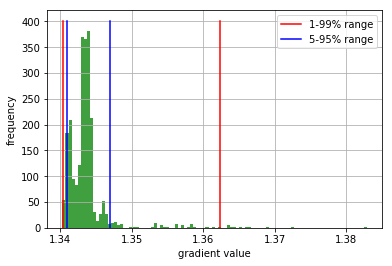

In [11]:
n, bins, patches = plt.hist(np.array(m), 100, density=True, facecolor='g', alpha=0.75)

percentile_50 = np.percentile(m,50)
print('Value of 50th percentile:')
print(percentile_50)

percentile_1 = np.percentile(m,1)
percentile_99 = np.percentile(m,99)
print('Value of 1st percentile:')
print(percentile_1)
print('Value of 99th percentile:')
print(percentile_99)

percentile_5 = np.percentile(m,5)
percentile_95 = np.percentile(m,95)
print('Value of 5th percentile:')
print(percentile_5)
print('Value of 95th percentile:')
print(percentile_95)

my_ylim = plt.gca().get_ylim()
plt.plot([percentile_1,percentile_1],[my_ylim[0],my_ylim[1]],'r',label = '1-99% range')
plt.plot([percentile_99,percentile_99],[my_ylim[0],my_ylim[1]],'r')

plt.plot([percentile_5,percentile_5],[my_ylim[0],my_ylim[1]],'b',label = '5-95% range')
plt.plot([percentile_95,percentile_95],[my_ylim[0],my_ylim[1]],'b')

plt.xlabel('gradient value')
plt.ylabel('frequency')
plt.grid(True)

plt.legend()

plt.show()

# Histogram of gradient on y intercept

Value of 50th percentile:
-0.672900859033
Value of 1st percentile:
-0.76726108046
Value of 99th percentile:
-0.658708369389
Value of 5th percentile:
-0.701126833601
Value of 95th percentile:
-0.661400252212


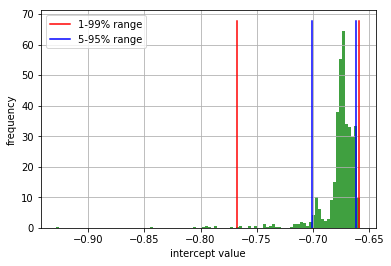

In [12]:
n, bins, patches = plt.hist(np.array(c), 100, density=True, facecolor='g', alpha=0.75)

c_percentile_50 = np.percentile(c,50)
print('Value of 50th percentile:')
print(c_percentile_50)

c_percentile_1 = np.percentile(c,1)
c_percentile_99 = np.percentile(c,99)
print('Value of 1st percentile:')
print(c_percentile_1)
print('Value of 99th percentile:')
print(c_percentile_99)

c_percentile_5 = np.percentile(c,5)
c_percentile_95 = np.percentile(c,95)
print('Value of 5th percentile:')
print(c_percentile_5)
print('Value of 95th percentile:')
print(c_percentile_95)

my_ylim = plt.gca().get_ylim()
plt.plot([c_percentile_1,c_percentile_1],[my_ylim[0],my_ylim[1]],'r',label = '1-99% range')
plt.plot([c_percentile_99,c_percentile_99],[my_ylim[0],my_ylim[1]],'r')

plt.plot([c_percentile_5,c_percentile_5],[my_ylim[0],my_ylim[1]],'b',label = '5-95% range')
plt.plot([c_percentile_95,c_percentile_95],[my_ylim[0],my_ylim[1]],'b')

plt.legend()

plt.xlabel('intercept value')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

In [9]:
print('y = m * x +c')

print('mean relationship')
print('y = '+str(percentile_50)+' * x + '+str(str(c_percentile_50)))

print('relationship 95% lower bound')
print('y = '+str(percentile_5)+' * x + '+str(str(c_percentile_5)))

print('relationship 95% upper bound')
print('y = '+str(percentile_95)+' * x + '+str(str(c_percentile_95)))

y = m * x +c
mean relationship
y = 1.34332594799 * x + -0.672900859033
relationship 95% lower bound
y = 1.34093260096 * x + -0.701126833601
relationship 95% upper bound
y = 1.34697898267 * x + -0.661400252212
